In [162]:
# ******************************************
# yanrpi @2021
# ******************************************

import matplotlib.pyplot as plt

import numpy as np

from skimage import io
from skimage.feature import greycomatrix, greycoprops

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

import os
from os import path

In [209]:
label_train = np.loadtxt('./ct_us/train.txt', dtype='int')
print(label_train.shape)
number_of_training = label_train.shape[0]

folder_train = './ct_us/train'

filenames = [path.join(folder_train, 'train_{}.png'.format(i+1)) for i in range(number_of_training)]
#print(filenames)


(120,)


./ct_us/train/train_9.png
0 255
(256, 256, 3, 5)


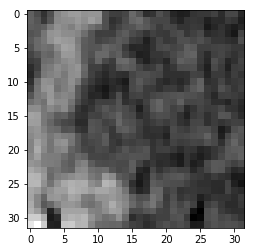

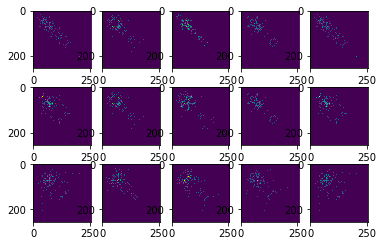

In [206]:
filename = filenames[8]
image = io.imread(filename)
print(filename)

plt.imshow(image, cmap='gray')
print(image.min(), image.max())

# 1.a GLCM
# https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=greycomatrix#skimage.feature.greycomatrix
comat = greycomatrix(image, [1,2,3], [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi], normed=True, symmetric=True)
comat[0:5,0:5,:,:] = 0 # Suppress background pixels
#comat /= comat.max()
print(comat.shape)
#print(comat[:,:,0,0])

#print(comat[:,:,0,0])

plt.figure()
for i in range(3):
    for j in range(5):
        plt.subplot(3, 5, i*5 + j + 1)
        plt.imshow(comat[:,:,i,j])
        
# 1.b Compute distances between two matrices (comat)

In [87]:
# https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=greycoprops#skimage.feature.greycoprops
contrast = greycoprops(comat, 'contrast')
energy = greycoprops(comat, 'energy')

print(contrast.shape)
print(contrast)
print(energy)

(3, 4)
[[1164.06979167  625.83350676  723.69895833  626.46097815]
 [1463.83836207 1151.97666667 1015.02047414 1121.37666667]
 [1601.04464286 1363.74554102 1106.97433036 1331.75980975]]
[[0.02591637 0.02589985 0.02572727 0.02598333]
 [0.02571573 0.0262702  0.02592933 0.0262702 ]
 [0.02612656 0.02654829 0.02668088 0.02691851]]


In [207]:
number_of_files = len(filenames)

distances = [1]
#distances = [1,2,3,4,5,6,7]
angles = [0, np.pi/4]
#angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
feature_all = np.zeros((number_of_files, len(distances) * len(angles)))

# Go through all the training images
for i in range(number_of_files):
    #print('Analyzing image {}'.format(filenames[i]))
    image = io.imread(filenames[i])
    
    #comat = greycomatrix(image, , normed=True, symmetric=True)
    comat = greycomatrix(image, distances, angles, normed=True, symmetric=True)
    comat[0:5,0:5] = 0 # Remove background influence
    
    # 2. Include other measures
    # * energy
    # * contrast
    # * dissimilarity
    # * homogeneity
    # * ASM
    # * correlation
    feature = greycoprops(comat, 'correlation')
    
    feature_all[i] = feature.ravel()


In [208]:
#colors = ['red' if label_train[i] else 'blue' for i in range(number_of_files)]
#plt.scatter(feature_all[:,0], feature_all[:,1], c = colors, label = label_train)

In [198]:
#X = np.concatenate((contrast_all, energy_all), axis=1)
#X = energy_all

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=2, random_state=0).fit(feature_all)

print(kmeans.labels_)
print(label_train)

print('The classification accuracy is: {}'.format(accuracy_score(label_train, kmeans.labels_)))
print('The classification accuracy is: {}'.format(accuracy_score(label_train, 1 - kmeans.labels_)))

[0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
The classification accuracy is: 0.4666666666666667
The classification accuracy is: 0.5333333333333333
